## PROJECT 36: Forecasting energy consumption for train traction

> ### TASK: To study various modern approaches and models to forecasting power consumption for train traction


### Stage goal

- **Exploratory data analysis**


### IMPORT LIBRARIES

In [1]:
# !pip install -U statsmodels

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# plt.style.use('bmh')
import seaborn as sns
sns.set_style('darkgrid')

import statsmodels.api as sm

### LOAD DATA

In [3]:
# Path to data
data_path ="/content/drive/MyDrive/Project_36_Forecasting_energy_consumption_for_train_traction/data/Raskhod_EP_24_03_2020.csv"

In [4]:
# Load the data
data_df = pd.read_csv(data_path, sep=';')

# Check result 
data_df.head()

,Ввод подстанции,Date,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,Расход,Макс.
0,Бада - Ввод Т1 27.5 кВ,01.01.2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
1,Бада - Ввод Т1 27.5 кВ,02.01.2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
2,Бада - Ввод Т1 27.5 кВ,03.01.2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
3,Бада - Ввод Т1 27.5 кВ,04.01.2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
4,Бада - Ввод Т1 27.5 кВ,05.01.2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0


In [5]:
data_df.tail()

,Ввод подстанции,Date,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,Расход,Макс.
32020,Новая - Ввод Т2 27.5 кВ,29.02.2020,10023.0,8875.0,5788.0,7143.0,10006.0,6431.0,7214.0,8474.0,8109.0,7509.0,8857.0,9066.0,7319.0,7396.0,4105.0,4030.0,3263.0,7174.0,8147.0,7700.0,8316.0,7148.0,7863.0,8186.0,178143,10023
32021,Новая - Ввод Т2 27.5 кВ,01.03.2020,10045.0,10424.0,8378.0,8424.0,8485.0,6569.0,7014.0,8826.0,7850.0,6899.0,7740.0,8461.0,7504.0,8512.0,9482.0,10276.0,8719.0,8393.0,6714.0,7790.0,7786.0,5947.0,7812.0,7894.0,195943,10424
32022,Новая - Ввод Т2 27.5 кВ,02.03.2020,8136.0,6215.0,5141.0,4952.0,4855.0,4066.0,5370.0,7183.0,8532.0,7172.0,6648.0,7887.0,6860.0,4261.0,5555.0,4827.0,2138.0,1362.0,409.0,464.0,821.0,631.0,3337.0,4992.0,111815,8532
32023,Новая - Ввод Т2 27.5 кВ,03.03.2020,4440.0,4224.0,1899.0,5546.0,7229.0,4607.0,4200.0,4468.0,5247.0,6987.0,7790.0,8180.0,8688.0,9548.0,10160.0,9627.0,9079.0,7066.0,6833.0,8067.0,8591.0,9082.0,8347.0,8402.0,168307,10160
32024,Новая - Ввод Т2 27.5 кВ,04.03.2020,9832.0,9979.0,8107.0,8917.0,11284.0,10846.0,6127.0,7498.0,8490.0,8778.0,6816.0,8059.0,9755.0,3978.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,118463,11284


# EXPLORATORY DATA ANALYSIS

In [6]:
# The shape of the original data set
print("The shape of the original data set:\n{}".format(data_df.shape))

The shape of the original data set:
(32025, 28)


In [7]:
# Check the missing values
print("Check the number of records")
print("Number of records: ", data_df.shape[0], "\n")

print("Null analysis")
empty_sample = data_df[data_df.isnull().any(axis=1)]
print("Number of records contain 1+ null: ", empty_sample.shape[0], "\n")

Check the number of records
Number of records:  32025 

Null analysis
Number of records contain 1+ null:  4914 



In [8]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32025 entries, 0 to 32024
Data columns (total 28 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ввод подстанции  32025 non-null  object 
 1   Date             32025 non-null  object 
 2   1                27132 non-null  float64
 3   2                27132 non-null  float64
 4   3                27132 non-null  float64
 5   4                27132 non-null  float64
 6   5                27132 non-null  float64
 7   6                27132 non-null  float64
 8   7                27132 non-null  float64
 9   8                27132 non-null  float64
 10  9                27132 non-null  float64
 11  10               27132 non-null  float64
 12  11               27132 non-null  float64
 13  12               27132 non-null  float64
 14  13               27132 non-null  float64
 15  14               27132 non-null  float64
 16  15               27111 non-null  float64
 17  16          

In [9]:
# List of variables
data_df.columns.to_list()

['Ввод подстанции',
 'Date',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 'Расход',
 'Макс.']

In [10]:
# Dictionary of variables
list_of_variables = {'Ввод подстанции' : 'entering_substation',
                     'Date' : 'date',
                     'Расход' : 'consumption',
                     'Макс.' : 'max_consumption'}     

In [11]:
# Re-assign variables
data_df = data_df.rename(columns = list_of_variables)

# Check result 
data_df.head(1)

,entering_substation,date,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,consumption,max_consumption
0,Бада - Ввод Т1 27.5 кВ,01.01.2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0


### Verify data quality

In [12]:
def verify_data_quality (evaluated_dataset):
    # Data type checking
    print("Data types:\n{}\n".format(evaluated_dataset.dtypes) + '_' * 100+ '\n')

    # Checking for NaN values
    print("Missing values:\n{}\n".format(evaluated_dataset.isnull().sum().sum()) + '_' * 100+ '\n')

    # Number of values other than NaN
    print("Number of values other than NaN:\n{}\n".format(evaluated_dataset.count().sum()) + '_' * 100+ '\n')

    # Search for duplicate strings
    print("Duplicate strings:\n{}\n".format(evaluated_dataset.duplicated().sum()) + '_' * 100+ '\n')

    # Data Set form
    print("Dataset form:\n{}\n".format(evaluated_dataset.shape) + '_' * 100+ '\n')

    # Data set index type
    print("Dataset index:\n{}\n".format(evaluated_dataset.index) + '_' * 100+ '\n')

In [13]:
verify_data_quality(data_df)

Data types:
entering_substation     object
date                    object
1                      float64
2                      float64
3                      float64
4                      float64
5                      float64
6                      float64
7                      float64
8                      float64
9                      float64
10                     float64
11                     float64
12                     float64
13                     float64
14                     float64
15                     float64
16                     float64
17                     float64
18                     float64
19                     float64
20                     float64
21                     float64
22                     float64
23                     float64
24                     float64
consumption              int64
max_consumption          int64
dtype: object
____________________________________________________________________________________________________

Miss

### Data type conversions

In [14]:
data_df['date'] = pd.to_datetime(data_df['date'])

#Check result 
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32025 entries, 0 to 32024
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   entering_substation  32025 non-null  object        
 1   date                 32025 non-null  datetime64[ns]
 2   1                    27132 non-null  float64       
 3   2                    27132 non-null  float64       
 4   3                    27132 non-null  float64       
 5   4                    27132 non-null  float64       
 6   5                    27132 non-null  float64       
 7   6                    27132 non-null  float64       
 8   7                    27132 non-null  float64       
 9   8                    27132 non-null  float64       
 10  9                    27132 non-null  float64       
 11  10                   27132 non-null  float64       
 12  11                   27132 non-null  float64       
 13  12                   27132 non-

### Sorting, reordering, reindexing

In [15]:
# Creating a multi-index
data_df = data_df.set_index(['date','entering_substation'])
#Check result 
data_df.index

MultiIndex([('2016-01-01',  'Бада - Ввод Т1 27.5 кВ'),
            ('2016-02-01',  'Бада - Ввод Т1 27.5 кВ'),
            ('2016-03-01',  'Бада - Ввод Т1 27.5 кВ'),
            ('2016-04-01',  'Бада - Ввод Т1 27.5 кВ'),
            ('2016-05-01',  'Бада - Ввод Т1 27.5 кВ'),
            ('2016-06-01',  'Бада - Ввод Т1 27.5 кВ'),
            ('2016-07-01',  'Бада - Ввод Т1 27.5 кВ'),
            ('2016-08-01',  'Бада - Ввод Т1 27.5 кВ'),
            ('2016-09-01',  'Бада - Ввод Т1 27.5 кВ'),
            ('2016-10-01',  'Бада - Ввод Т1 27.5 кВ'),
            ...
            ('2020-02-24', 'Новая - Ввод Т2 27.5 кВ'),
            ('2020-02-25', 'Новая - Ввод Т2 27.5 кВ'),
            ('2020-02-26', 'Новая - Ввод Т2 27.5 кВ'),
            ('2020-02-27', 'Новая - Ввод Т2 27.5 кВ'),
            ('2020-02-28', 'Новая - Ввод Т2 27.5 кВ'),
            ('2020-02-29', 'Новая - Ввод Т2 27.5 кВ'),
            ('2020-01-03', 'Новая - Ввод Т2 27.5 кВ'),
            ('2020-02-03', 'Новая - Ввод Т2 27.5 

In [16]:
# Index of the first level
data_df.index.levels[0]

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05', '2016-01-06', '2016-01-07', '2016-01-08',
               '2016-01-09', '2016-01-10',
               ...
               '2020-08-01', '2020-08-02', '2020-09-01', '2020-09-02',
               '2020-10-01', '2020-10-02', '2020-11-01', '2020-11-02',
               '2020-12-01', '2020-12-02'],
              dtype='datetime64[ns]', name='date', length=1525, freq=None)

In [17]:
# Second-level index
data_df.index.levels[1]

Index(['Бада - Ввод Т1 27.5 кВ', 'Бада - Ввод Т2 27.5 кВ',
       'Белогорск - Ввод Т1 27.5 кВ', 'Белогорск - Ввод Т2 27.5 кВ',
       'Бушулей - Ввод Т1 27.5 кВ', 'Бушулей - Ввод Т2 27.5 кВ',
       'Завитая - Ввод Т1 27.5 кВ', 'Завитая - Ввод Т2 27.5 кВ',
       'Зилово - Ввод Т1 27.5 кВ', 'Зилово - Ввод Т3 27.5 кВ',
       'Карымская - Ввод Т1 27.5 кВ', 'Карымская - Ввод Т2 27.5 кВ',
       'Карымская - Ввод Т6 27.5 кВ', 'Магдагачи - Ввод Т1 27.5 кВ',
       'Магдагачи - Ввод Т2 27.5 кВ', 'Могзон - Ввод Т1 27.5 кВ',
       'Могзон - Ввод Т2 27.5 кВ', 'Могоча - Ввод Т1 27.5 кВ',
       'Могоча - Ввод Т2 27.5 кВ', 'Новая - Ввод Т1 27.5 кВ',
       'Новая - Ввод Т2 27.5 кВ'],
      dtype='object', name='entering_substation')

In [18]:
# List of traction substations
data_df.index.levels[1].to_list()

['Бада - Ввод Т1 27.5 кВ',
 'Бада - Ввод Т2 27.5 кВ',
 'Белогорск - Ввод Т1 27.5 кВ',
 'Белогорск - Ввод Т2 27.5 кВ',
 'Бушулей - Ввод Т1 27.5 кВ',
 'Бушулей - Ввод Т2 27.5 кВ',
 'Завитая - Ввод Т1 27.5 кВ',
 'Завитая - Ввод Т2 27.5 кВ',
 'Зилово - Ввод Т1 27.5 кВ',
 'Зилово - Ввод Т3 27.5 кВ',
 'Карымская - Ввод Т1 27.5 кВ',
 'Карымская - Ввод Т2 27.5 кВ',
 'Карымская - Ввод Т6 27.5 кВ',
 'Магдагачи - Ввод Т1 27.5 кВ',
 'Магдагачи - Ввод Т2 27.5 кВ',
 'Могзон - Ввод Т1 27.5 кВ',
 'Могзон - Ввод Т2 27.5 кВ',
 'Могоча - Ввод Т1 27.5 кВ',
 'Могоча - Ввод Т2 27.5 кВ',
 'Новая - Ввод Т1 27.5 кВ',
 'Новая - Ввод Т2 27.5 кВ']

#### **As an example for further research and training of the model, we use the Belogorsk traction substation - Input T2 27.5 kV**

In [19]:
# Selection of traction substation
traction_substation_df = data_df.xs('Белогорск - Ввод Т2 27.5 кВ', level=1)['consumption']

In [20]:
traction_substation_df.head()

date
2016-01-01    0
2016-02-01    0
2016-03-01    0
2016-04-01    0
2016-05-01    0
Name: consumption, dtype: int64

### Descriptive Statistics

In [21]:
traction_substation_df.describe()

count      1525.000000
mean     147399.967869
std       78312.273173
min           0.000000
25%      120390.000000
50%      159863.000000
75%      208513.000000
max      287722.000000
Name: consumption, dtype: float64

### Distribution analysis

In [22]:
def distribution(data_for_eda):
    
    fig, ax = plt.subplots(1,3, figsize=(25, 5))
    fig.subplots_adjust(wspace=0.15)
    plt.suptitle("Distribution of observations", fontsize=18)
    
    sns.histplot(data = data_for_eda, bins = 20, stat = 'density', kde = False, ax=ax[0])
    sns.boxenplot(data = data_for_eda, ax=ax[1])
    sns.ecdfplot(data = data_for_eda, ax=ax[2])
    
    fig, ax = plt.subplots(1,1, figsize=(25, 5))
    data_for_eda.plot()
    plt.title("Distribution of consumption over time", fontsize=18)
    
    print("Descriptive statistics:\n{}\n".format(data_for_eda.describe().round(2)) + '_' * 100+ '\n')
    print("Skew:\n{}\n".format(data_for_eda.skew().round(2))+ '_' * 100+ '\n')
    print("Kurtosis:\n{}\n".format(data_for_eda.kurt().round(2)) + '_' * 100+ '\n')

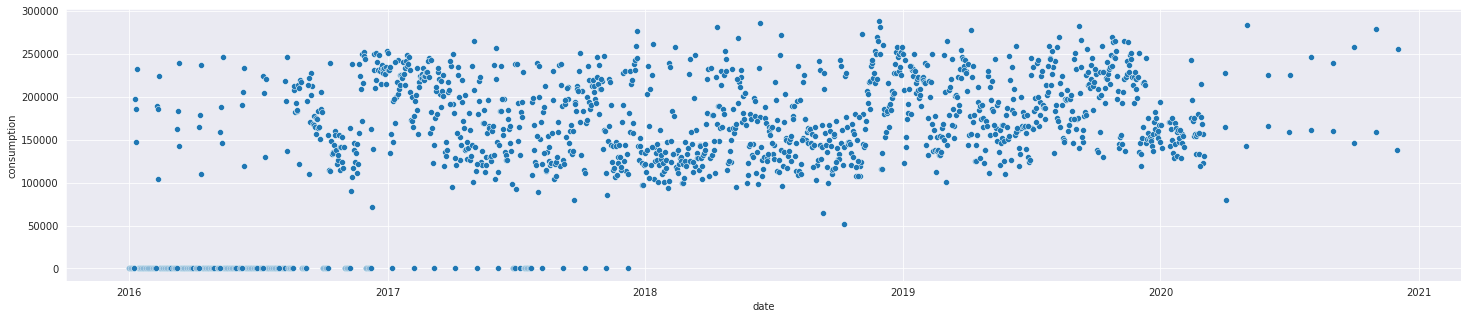

In [23]:
plt.subplots(figsize=(25, 5))
sns.scatterplot(data=traction_substation_df)
plt.show()

Descriptive statistics:
count      1525.00
mean     147399.97
std       78312.27
min           0.00
25%      120390.00
50%      159863.00
75%      208513.00
max      287722.00
Name: consumption, dtype: float64
____________________________________________________________________________________________________

Skew:
-0.75
____________________________________________________________________________________________________

Kurtosis:
-0.38
____________________________________________________________________________________________________



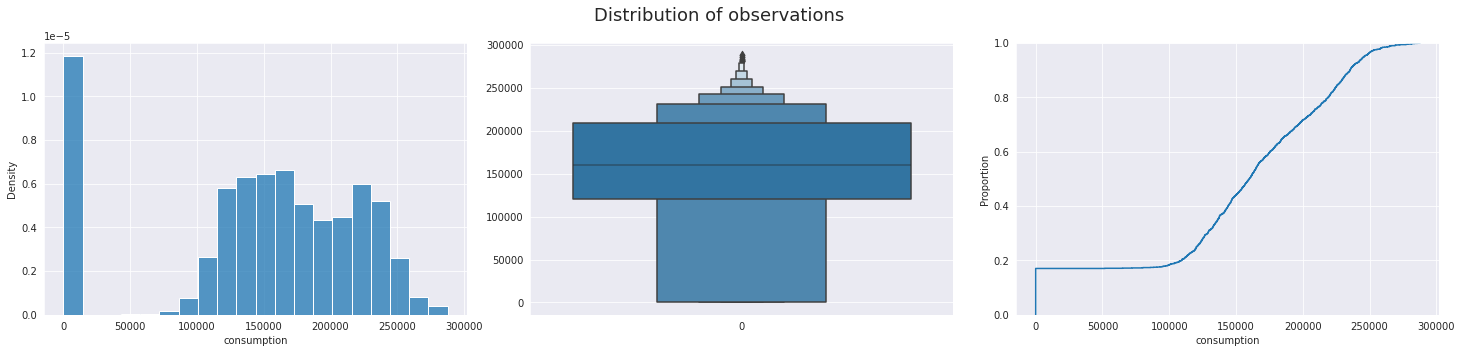

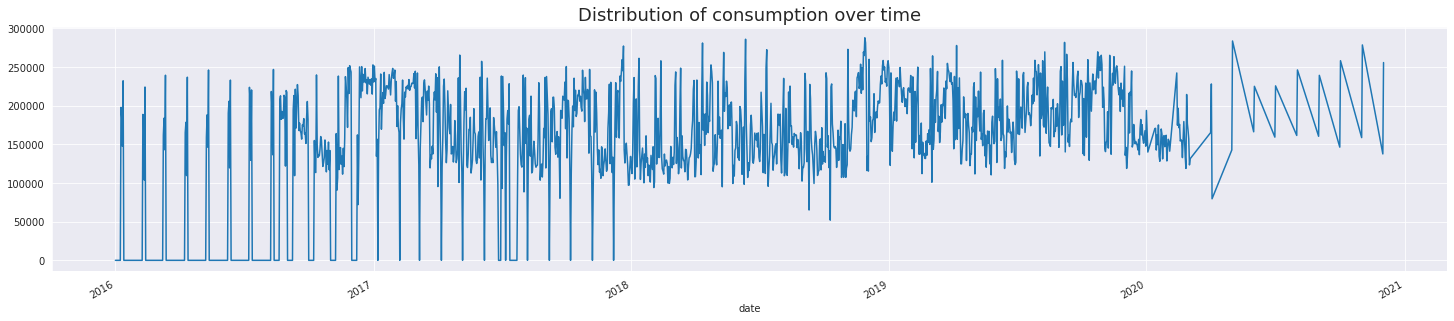

In [24]:
distribution(traction_substation_df)

#### **The actual observation period where qualitative data are available for analysis is in the range of years from 2017 to 2020. We use it as the main one.**

### Verify data quality for the selected substation

In [25]:
verify_data_quality(traction_substation_df)

Data types:
int64
____________________________________________________________________________________________________

Missing values:
0
____________________________________________________________________________________________________

Number of values other than NaN:
1525
____________________________________________________________________________________________________

Duplicate strings:
271
____________________________________________________________________________________________________

Dataset form:
(1525,)
____________________________________________________________________________________________________

Dataset index:
DatetimeIndex(['2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01',
               '2016-05-01', '2016-06-01', '2016-07-01', '2016-08-01',
               '2016-09-01', '2016-10-01',
               ...
               '2020-02-24', '2020-02-25', '2020-02-26', '2020-02-27',
               '2020-02-28', '2020-02-29', '2020-01-03', '2020-02-03',
          

In [26]:
# Removing duplicate values
traction_substation_df = traction_substation_df.drop_duplicates()

In [27]:
# Check result
print("Number of duplicate values:\n{}".format(traction_substation_df.duplicated().sum()))

Number of duplicate values:
0


In [28]:
# Selection of the required subset of data
traction_substation_df = traction_substation_df.sort_index(level=[0]).loc['2017-01-01':'2019-12-31']

### Distribution analysis

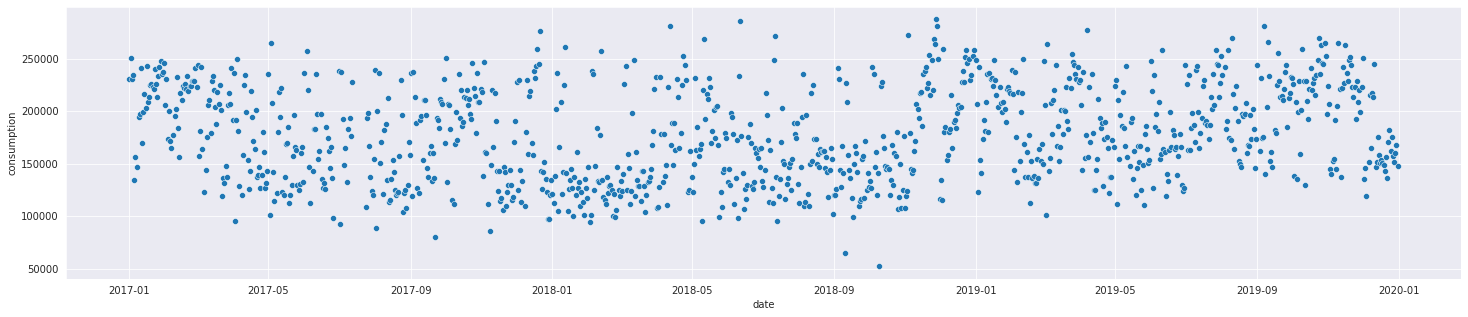

In [29]:
plt.subplots(figsize=(25, 5))
sns.scatterplot(data=traction_substation_df)
plt.show()

Descriptive statistics:
count      1058.00
mean     177756.68
std       45004.83
min       51961.00
25%      140346.75
50%      174013.50
75%      217447.50
max      287722.00
Name: consumption, dtype: float64
____________________________________________________________________________________________________

Skew:
0.13
____________________________________________________________________________________________________

Kurtosis:
-0.97
____________________________________________________________________________________________________



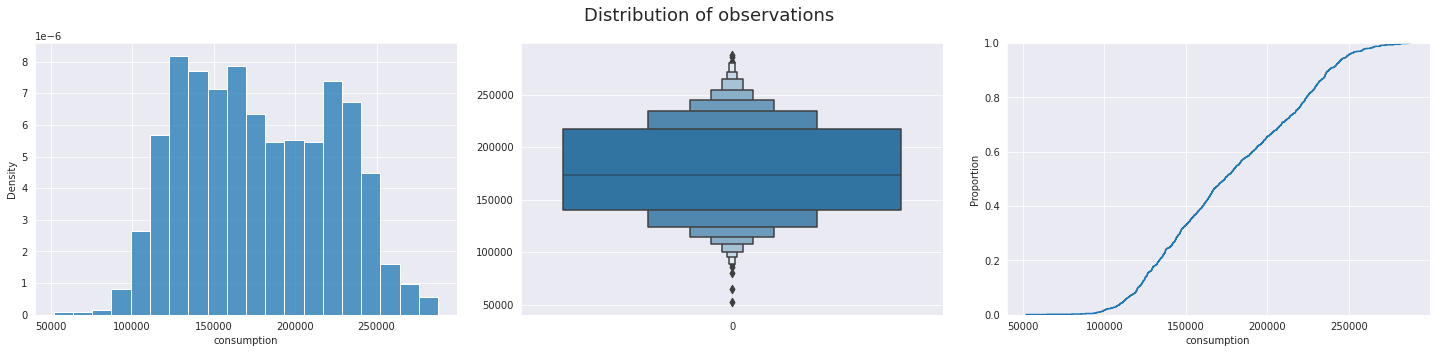

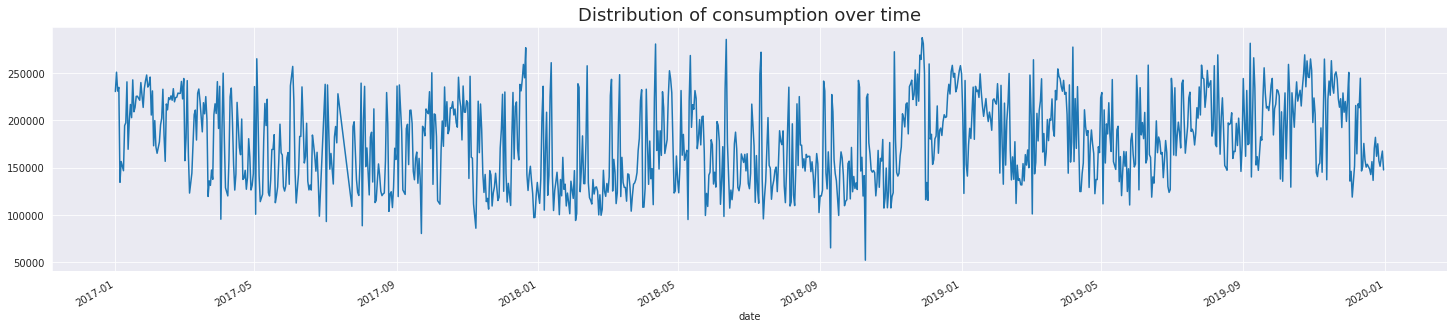

In [30]:
distribution(traction_substation_df)

### Trend analysis

In [50]:
def trend_analysis(data_for_eda):
    # BUILDING MOVING AVERAGES
    
    # 7-day moving average
    data_7d_rol = data_for_eda.rolling(window = 7, center = True).mean()

    # 30-day moving average
    data_30d_rol = data_for_eda.rolling(window = 30, center = True).mean()

    # 365-day moving average
    data_365d_rol = data_for_eda.rolling(window = 365, center = True).mean()
    
    #PLOTTING MOVING AVERAGES
    
    fig, ax = plt.subplots(figsize = (20,5))

    # plotting daily data
    ax.plot(data_for_eda, marker='*', markersize=2, color='0.6',linestyle='None', label='Daily')

    # A fallback version of the presentation
    # ax.plot(novaya_entering_t2, linewidth=2, label='Daily', color='0.6', alpha = 0.5 )

    # plotting 7-day rolling data
    ax.plot(data_7d_rol, linewidth=2, label='7-d Rolling Mean')

    # plotting 30-day rolling data
    ax.plot(data_30d_rol, linewidth=2, label='30-d Rolling Mean')

    # plotting annual rolling data
    ax.plot(data_365d_rol, color='0.2', linewidth=3, label='Trend (365-d Rolling Mean)')

        
    # Beautification of plot
    # ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.legend()
    ax.set_xlabel('Year')
    ax.set_ylabel('Consumption')
    ax.set_title('Trends', fontsize=18)

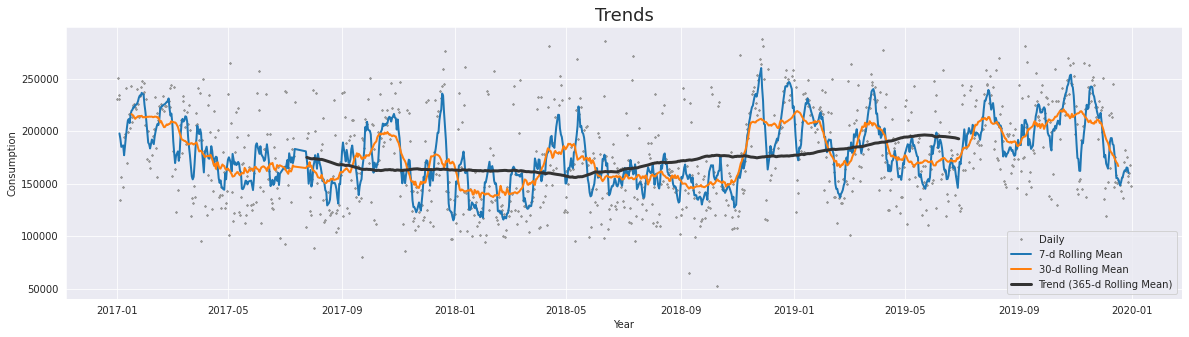

In [51]:
trend_analysis(traction_substation_df)

### Autocorrelation analysis

In [104]:
def autocorr_analysis(data_for_eda):
    
    fig, ax = plt.subplots(1, 2, figsize=(20, 3), dpi= 100)

    sm.graphics.tsa.plot_acf(data_for_eda.values.squeeze(), lags=60, ax=ax[0])
    sm.graphics.tsa.plot_pacf(data_for_eda.values.squeeze(), lags=60, ax=ax[1])
    plt.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


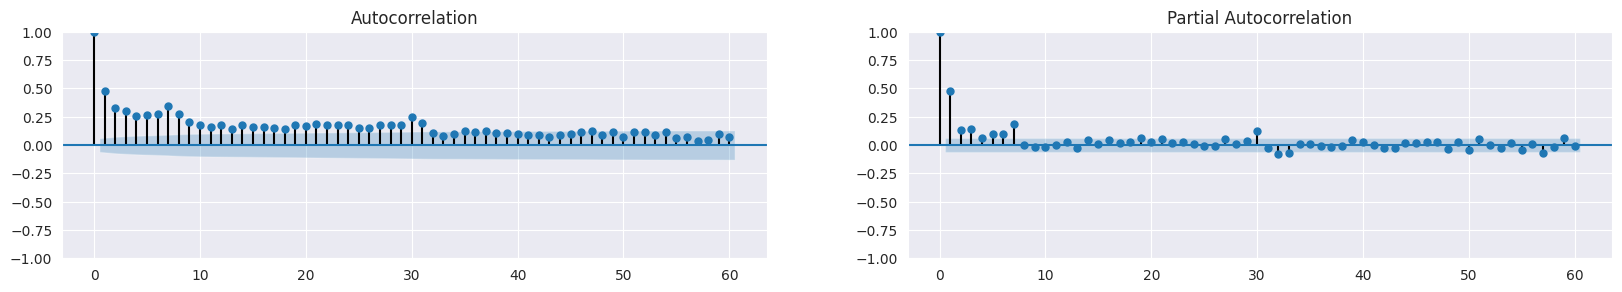

In [105]:
# Lag 30 days
autocorr_analysis(traction_substation_df)

### Analysis of seasonality

In [116]:
def seasonality_analysis(data_for_eda, period=365):
    seasonality = sm.tsa.seasonal_decompose(data_for_eda, model='multiplicative', period=period).seasonal
    fig, ax = plt.subplots(figsize = (20,5))
    ax.plot(seasonality)

In [129]:
def decomposition(data_for_eda, period=365):
    from pylab import rcParams
    rcParams['figure.figsize'] = 20,10
        
    decomposition = sm.tsa.seasonal_decompose(data_for_eda, model='multiplicative', period=period)
    
    decomposition.plot()

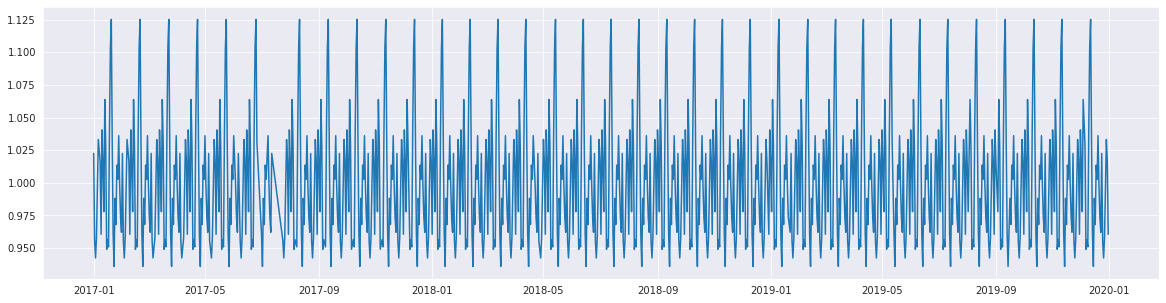

In [132]:
# Period 30 days
seasonality_analysis(traction_substation_df, period=30)

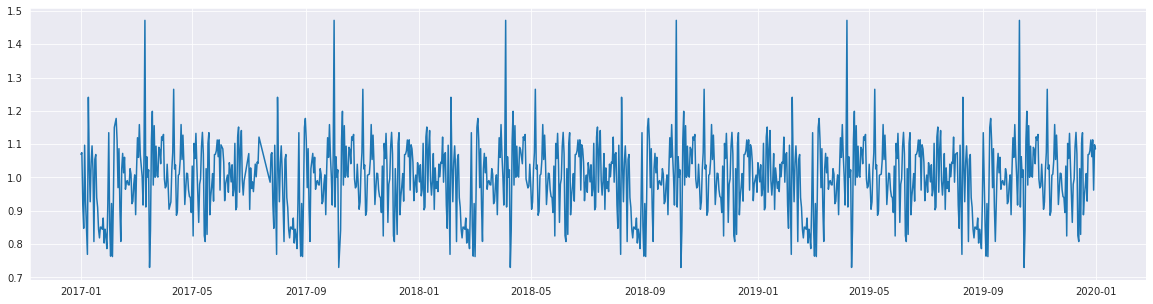

In [134]:
# Period 182 days
seasonality_analysis(traction_substation_df, period=182)

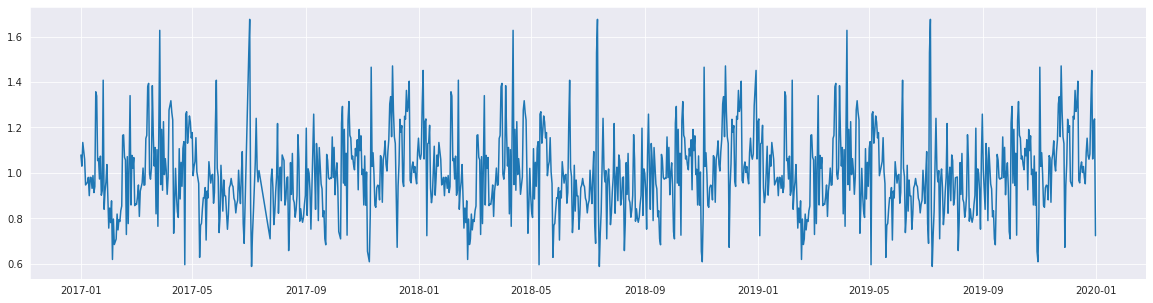

In [135]:
# Period 1 year
seasonality_analysis(traction_substation_df, period=356)

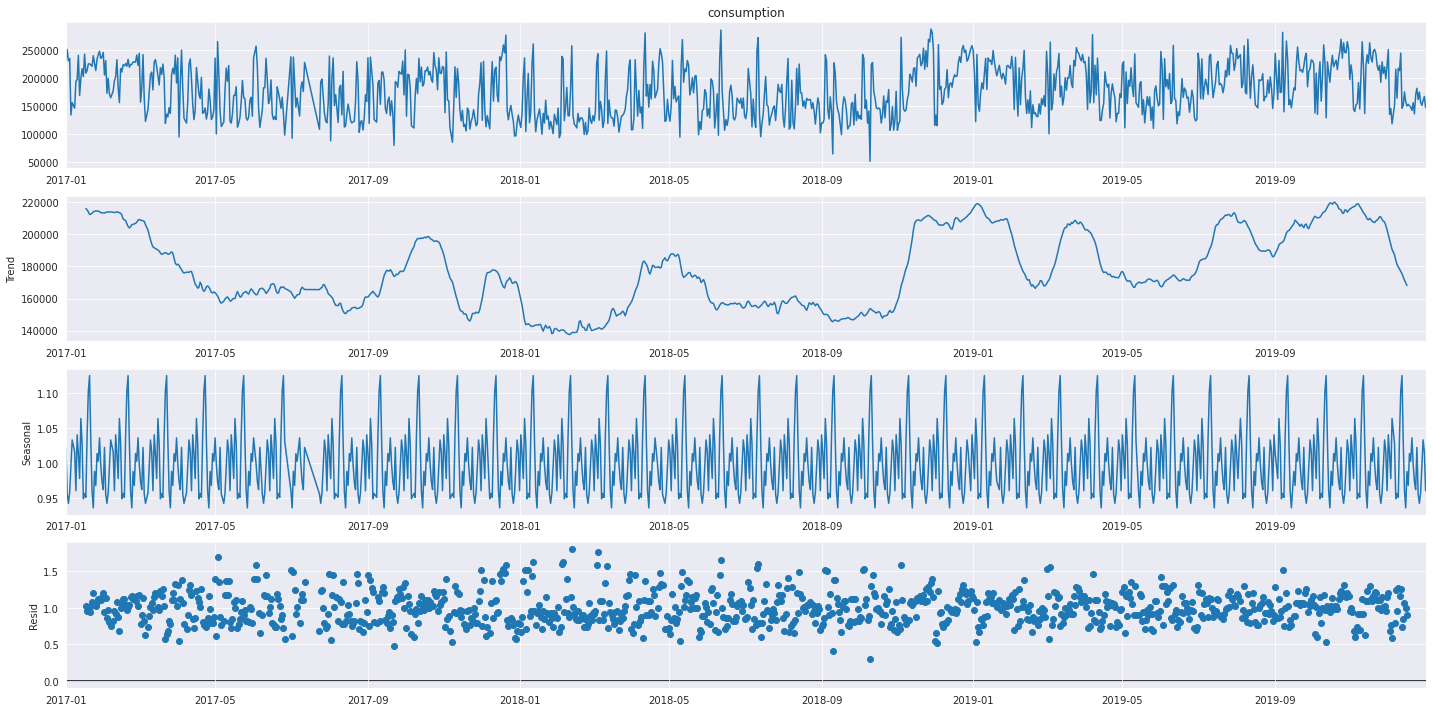

In [136]:
# Decomposition for 30 days
decomposition(traction_substation_df, period=30)

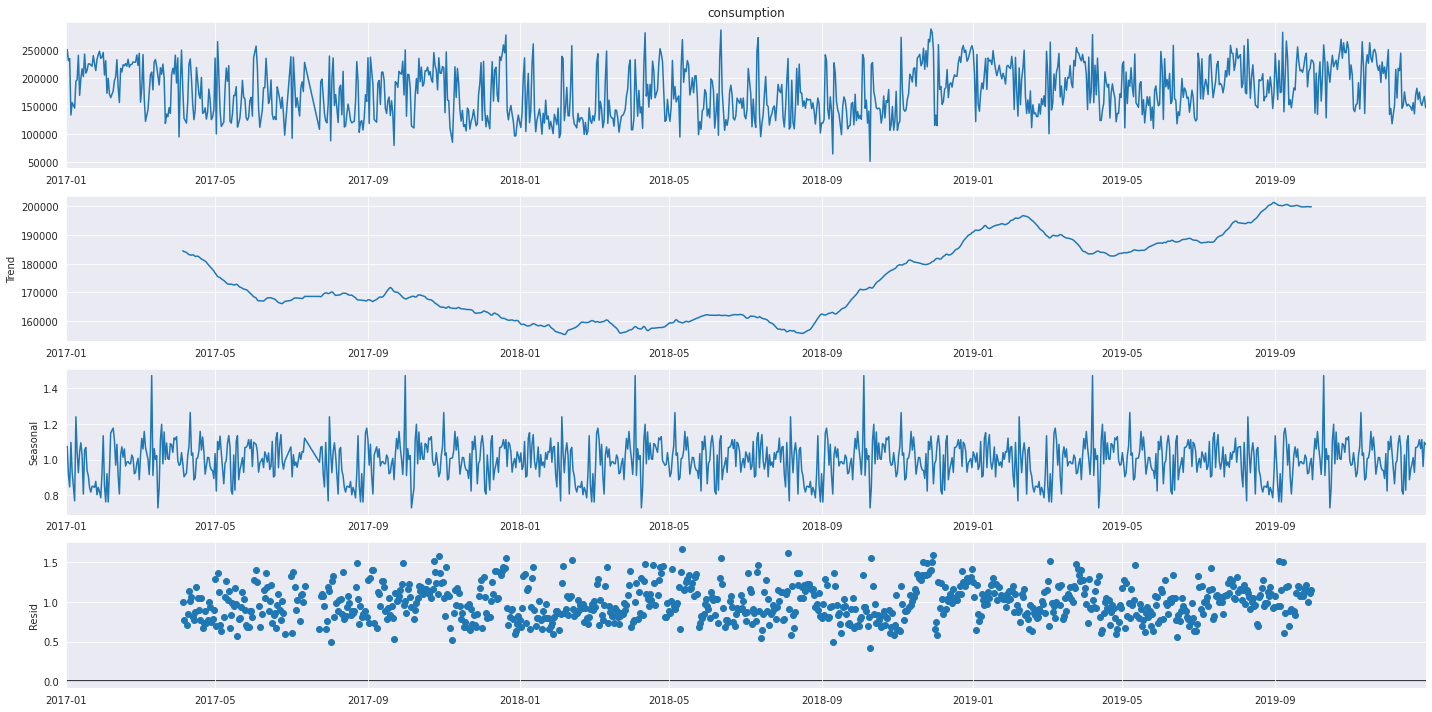

In [137]:
# Decomposition for 182 days
decomposition(traction_substation_df, period=182)

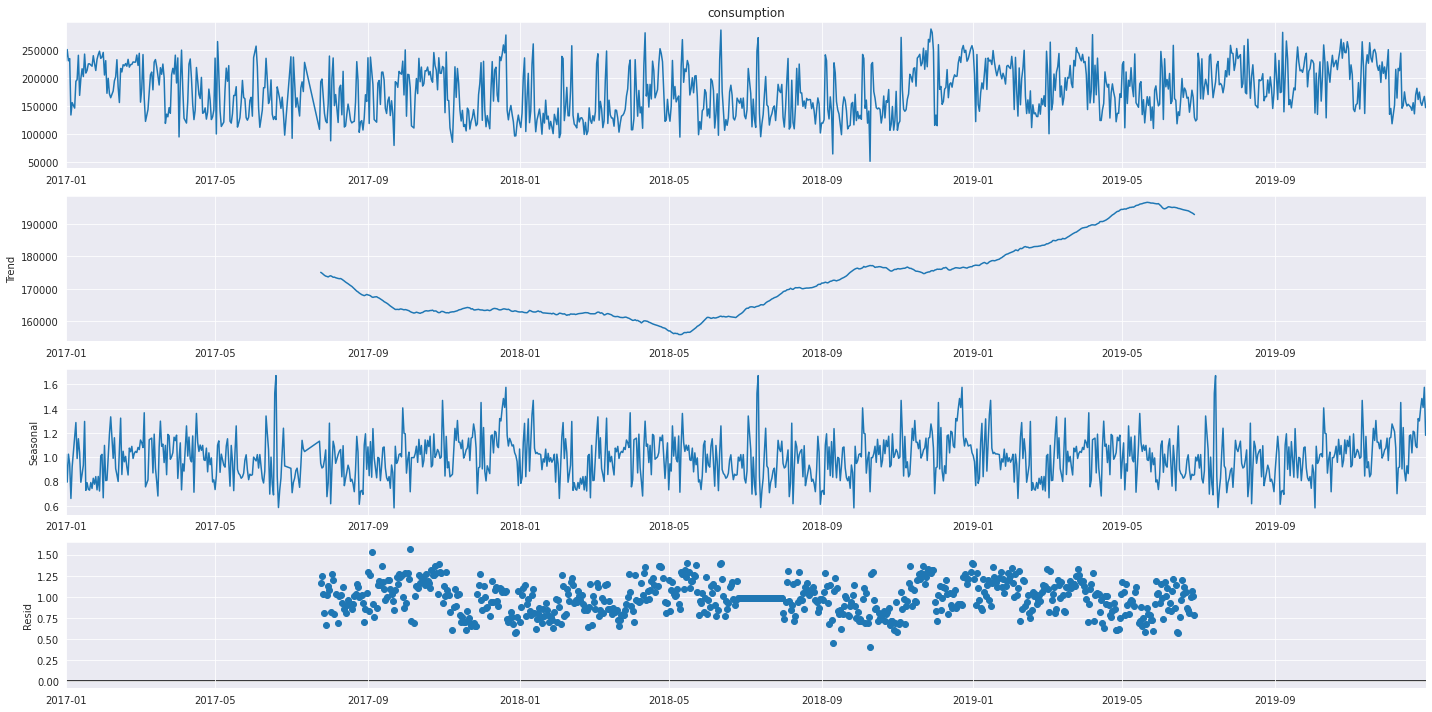

In [138]:
# Decomposition for 1 year
decomposition(traction_substation_df, period=365)

### Analysis of stationarity

In [127]:
def stationarity_analysis(data_for_eda):
    test = sm.tsa.adfuller(data_for_eda)
    print ('adf:', test[0])
    print ('p-value:', test[1])
    print ('Critical values:', test[4])
    if test[0]> test[4]['5%']: 
        print ('\n There are single roots, the row is not stationary')
    else:
        print ('\n There are no single roots, the row is STATIONARY')

In [128]:
stationarity_analysis(traction_substation_df)

adf: -6.142128729602168
p-value: 7.924662011503752e-08
Critical values: {'1%': -3.4365872439265366, '5%': -2.8642939151214337, '10%': -2.568236291810346}

 There are no single roots, the row is STATIONARY
